In [375]:
import matplotlib.pyplot as plt
import os

#Hamming code 8-12 implementation by Arseniy Koveshnikov from BIVT-18-3
#ITKN APD, NUST MISIS

base_path = "A:/hobby/vuz/miszki/aperture"
filename = "input.txt"
path_to_file = os.path.join(base_path, filename)
with open(path_to_file , 'r') as inputfile:
    lines = [line.strip('\n') for line in inputfile]
    x = 0
    inputx = []
    inputy = []
    for i in lines:
        inputx.append(x)
        inputy.append(int(i))
        x += 1

Исходный массив точек:
X: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
Y: [5, 10, 12, 30, 40, 12, 10, 8, 17, 22, 15, 20, 19, 18, 17, 16, 39, 36]


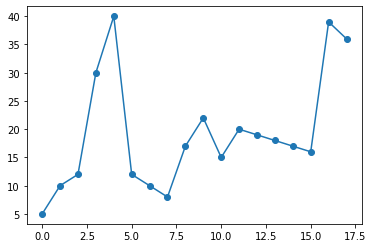

In [376]:
print("Исходный массив точек:")
print("X:", inputx)
print("Y:", inputy)

plt.plot(inputx, inputy, marker='o')
plt.show()

Заданная апертура равна 1
6.0 6.0 22.4 34.74074074074074 5.888888888888889 2.8571428571428568 2.25 5.0 11.444444444444445 3.3076923076923084 6.6 5.444444444444445 3.571428571428571 1.8000000000000007 7.666666666666664 3.0 

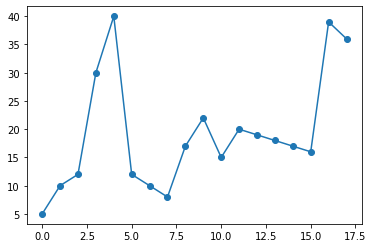

In [383]:
aperture = 1
#input(aperture)
print("Заданная апертура равна", aperture)

#функция линейной интерполяции, поиск Y исходя из значений [X1, Y1] и [X2, Y2] через уравнение прямой
def interpolate(x1,y1,x2,y2,x):
    return (x - x2) * (y1 - y2) / (x1 - x2) + y2

newx = inputx[:]
newy = inputy[:]

for i in range(len(inputx)-2):
    check_y = inputy[i+1]
    interpolated_y = interpolate(inputx[i], inputx[i+2], inputy[i], inputy[i+2], inputx[i+1])
    print(abs(check_y - interpolated_y), end=' ')
    if (abs(check_y - interpolated_y) < aperture):
        newx[i+1] = None

plt.plot(newx, newy, marker='o', label='new', )
plt.show()